In [165]:
## librerie 
import pandas as pd
import matplotlib.pyplot  as plt
import geopandas as gpd

## Da una stringa legge lultima parte da DX -> SX finchè non trova la virgola
def extract_country(location):
    country= location.split(',')[-1].strip()
    ## gestire la francia
    if (country == 'France'):
        country= location.split(',')[-2].strip()
        
    return country

In [166]:
## import dataset

df_all_launches= pd.read_csv('datasets/Space_Corrected.csv')
## Le prime due colonne sono inutili, vanno eliminate
df_all_launches.drop(['Unnamed: 0.1', 'Unnamed: 0'], 
                     axis=1, 
                     inplace=True)
## Riformattare data in un formato standard
df_all_launches['Datum'] = pd.to_datetime(df_all_launches['Datum'], 
                                          utc=True, 
                                          errors='coerce')

## Aggiunge una colonna "year" per analisi successiva
year = df_all_launches['Datum'].dt.year
df_all_launches['Year'] = year

## Estrai i Paesi di lancio dalla colonna Location 
df_all_launches['Country'] = df_all_launches['Location'].apply(extract_country)
df_all_launches.head()

## rinonimare alcuni stati per farlo stampare correttamente nelle mappe della libreria geopandas
df_all_launches['Country'] = df_all_launches['Country'].replace({'USA': 'United States of America'})
df_all_launches['Country'] = df_all_launches['Country'].replace({'French Guiana': 'Guyana'})




# Analisi preliminare

Text(0, 0.5, 'Number of missions')

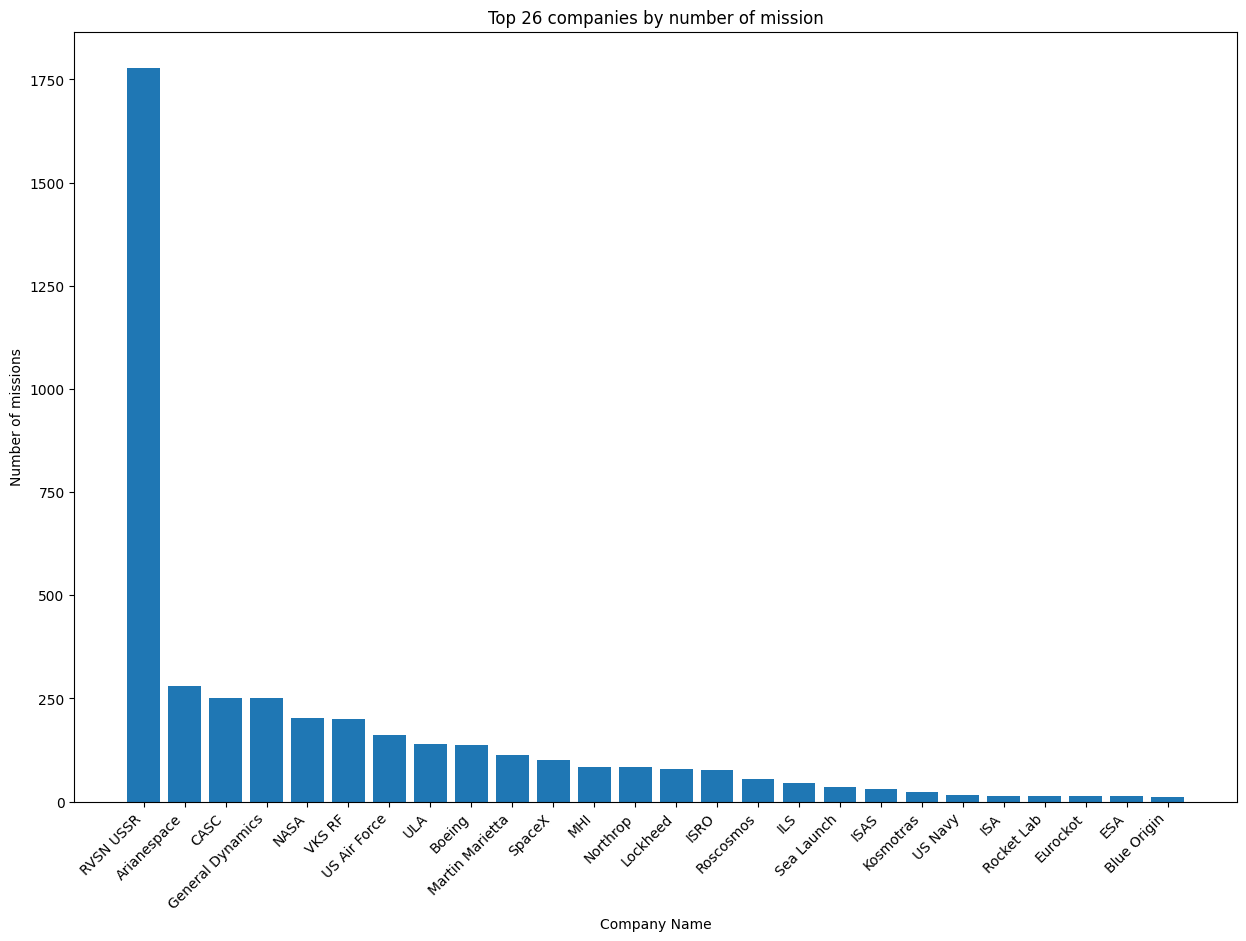

In [167]:
## chi lancia
## per motivi di leggibilità sono state selezionate le prime 26 aziende
## (fino alla blue origin)

company_launches = df_all_launches['Company Name'].value_counts().head(26)

company_names=company_launches.index 
nr_company_launches= company_launches.values

company_launches_graph= plt.figure(figsize = (15,10))
plt.bar(company_names,
        nr_company_launches,
        )
plt.xticks(rotation = 45, 
           ha = 'right' # right è l unico che non sovrappone il testo
           )
plt.title('Top 26 companies by number of mission')
plt.xlabel('Company Name')
plt.ylabel('Number of missions')


C:\Users\Thomas\AppData\Local\Temp\ipykernel_3240\1326525125.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


Text(0.5, 1.0, 'Number of Space Launches by Country')

<Figure size 1500x500 with 0 Axes>

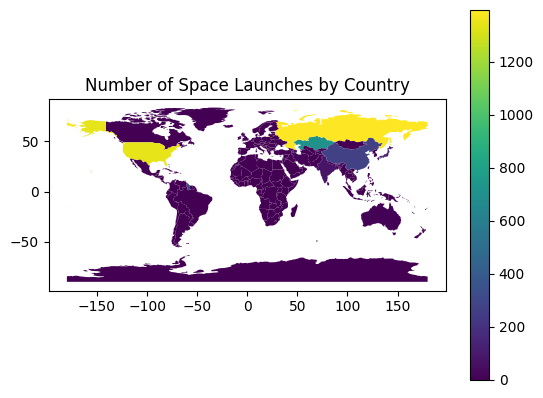

In [168]:
## da dove si lancia

launches_by_country = df_all_launches['Country'].value_counts()

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world2= world.merge(launches_by_country, 
                   how='left', 
                   left_on='name', 
                   right_index=True
                   )

world2= world2.rename(columns={'count': 'country_launches'})

world2['country_launches'].fillna(0, inplace= True)


country_launches = plt.figure(figsize=(15, 5))
world2.plot(column='country_launches', 
            legend=True)
plt.title('Number of Space Launches by Country')




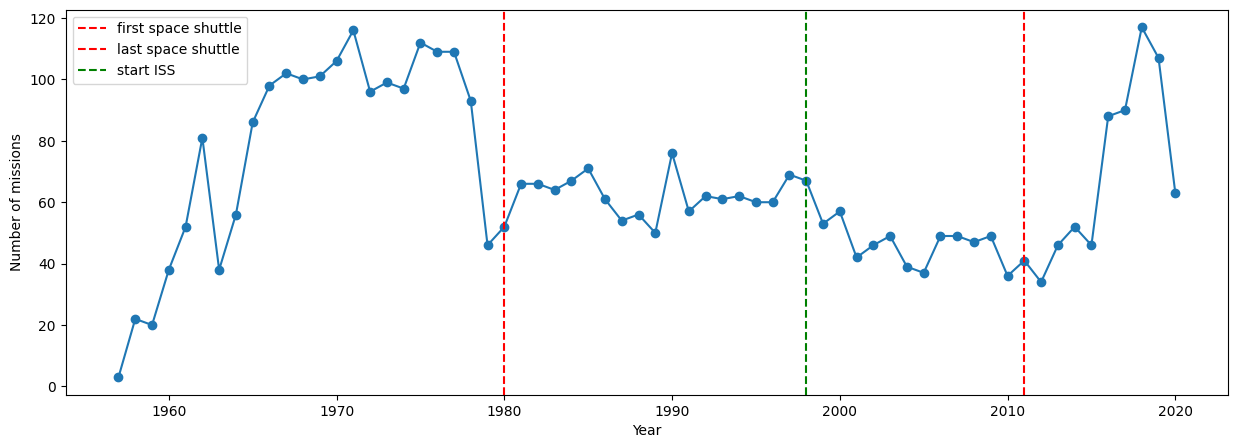

In [169]:

## cronologia lanci

missions_by_year = df_all_launches.groupby('Year').size()

years = missions_by_year.index
launches_by_year = missions_by_year.values

missions_by_year_graph = plt.figure(figsize=(15, 5))
plt.plot(years, 
         launches_by_year, 
         marker='o'
         )
plt.xlabel('Year')
plt.ylabel('Number of missions')
## date interessanti
plt.axvline(x=1980, color='red', linestyle='--', label='first space shuttle')
plt.axvline(x=2011, color='red', linestyle='--', label='last space shuttle')

plt.axvline(x=1998, color='green', linestyle='--', label='start ISS')

plt.legend()